# Instalação de módulos

## No windows

### Pelo cmd
### Instalacão e módulos externos

O `píp` é um repositório que guarda uma quantidade enorme de pacotes e módulos para utilizarmos em nossas aplicações.
Se o Python estiver adicionado ao PATH digite no terminal do windows:  
~~~
$ pip --version
~~~

Caso seu pip esteja desatualizado utilize:

~~~
$ python -m pip install --upgrade pip
~~~

Para instalar algum pacote execute:

~~~
$ pip install "nome do pacote"
~~~

ou ainda

~~~
$ python -m pip install "nome do pacote"
~~~

## Pelo Anaconda

Ao iniciar o Anaconda nos deparamos com a seguinte tela:
![tela_0](img/anaconda_tut0.png)
  
No painel a esquerda selecione **Enviroments**
![tela_1](img/anaconda_tut1.png)
  
Você será levado a tela de ambientes, agora iremos procurar pelo módulo que queremos instalar.  
Para isso, troque o filtra de **Installed** para **Not installed** e faça a busca no campo adequado.
![tela_2](img/anaconda_tut2.png)

Neste exemplo estaremos installando o módulo **scrapy** que é uma ótima ferramenta para web scrapping no Python.
![tela_3](img/anaconda_tut3.png)
![tela_4](img/anaconda_tut4.png)
![tela_5](img/anaconda_tut5.png)
![tela_6](img/anaconda_tut6.png)

Agora é só esperar o pacote terminar de ser baixado!

# Importação

Agora veremos as diferentes formas de importar módulos (os pacotes do python) para seu ambiente.

In [1]:
import numpy                        # Importa o módulo numpy
import pandas as pd                 # Importa o pacote pandas com um alias pd
import matplotlib.pyplot as plt     # Importa a classe pyplot dentro do pacote matplotlib com o alias plt
from os import getcwd               # Importa apenas a função getcwd do módulo os
from time import asctime as data    # Importa a penas a função asctime com o alias data 
from statistics import *            # Importa tudo que pertence ao módulo statistics

**Vejamos agora como cada forma de importação é utilizada!**

Veja que o numpy foi importado utilizando `import numpy` dessa forma devemos sempre colocar o nome do módulo antes de utilizar os métodos e atributos que ele possui

In [2]:
numpy.random.seed(60)
numpy.random.normal(0, 1, 10)       # Cria um array aleatório de tamanho 10 com distriuição normal mu = 0, sigma = 1.

array([-9.21770993e-01, -5.86317634e-01,  1.16399914e+00, -1.24172396e+00,
       -1.98523022e+00,  1.30670891e+00,  7.37807059e-01,  3.79111282e-01,
        9.89200864e-04, -1.10503482e+00])

Já em `from os import getcwd` apenas importamos a função `getcwd` do módulo os

In [3]:
getcwd()                            # Retorna o diretório atual do workspace.

'G:\\Documentos\\Documentos\\GIT\\python-basico\\notebooks\\03'

Utilizando o comando `from time import asctime as data` importamos a função asctime do módulo time e adicionamos um _alias_ data utilizando a _keyword_ `as`.

In [4]:
data()                              # Retorna a data de hoje

'Sat May 18 00:39:00 2019'

Ao utilizar `from statistics import *` estamos importando todas as funções e métodos pertencentes ao módulo statistics.
Não é aconselhável utilizar já que o código perde semântica.

In [5]:
numpy.random.seed(35)
numbers = numpy.random.randint(1, 20, 30)

print(mean(numbers))
print(harmonic_mean(numbers))
print(median(numbers))

9
4.522366591633217
10.5


# Pandas

<img src="img/pandas.jpg" alt="drawing" width="400"/>

A biblioteca Pandas fornece um conjuto de ferramentas de alta performace e de fácil utilização para trabalharmos com análise de dados, manipulação, vizualização e leitura de dados, sendo indispensável para quem trabalha com data science em Python.

### Séries
Séries são objetos unidimensionais parecidos com arrays, sua diferença é que Séries sempre possuirão índices.

In [6]:
numpy.random.seed(50)
notas = pd.Series(numpy.random.randint(1,10,6))
notas

0    1
1    1
2    2
3    5
4    7
5    6
dtype: int32

In [7]:
notas.dtypes

dtype('int32')

A primeira coluna ao mostrar a Série são os indíces, já a segunda os valores de cada índice.

Podemos checar os valores da Série utilizando o atributo `.values`

In [8]:
notas.values

array([1, 1, 2, 5, 7, 6])

Podemos checar os indices da Série utilizando o atributo `.index`

In [9]:
notas.index

RangeIndex(start=0, stop=6, step=1)

Perceba que os índices foram criados automaticamente. Entretanto, somos de capases de criar rótulos para os índices de nossa série.  
Suponha que a seguinte Série se trata do desempenho de 6 alunos em uma prova.

In [10]:
numpy.random.seed(17)
notas = pd.Series(numpy.random.randint(1,10,6), 
                  ['Daniel', 'Fernando', 'Maria', 'Carlos', 'Márcia', 'Luciana'])

In [11]:
notas

Daniel      2
Fernando    7
Maria       7
Carlos      1
Márcia      7
Luciana     5
dtype: int32

In [12]:
notas.index

Index(['Daniel', 'Fernando', 'Maria', 'Carlos', 'Márcia', 'Luciana'], dtype='object')

Podemos verificar o valor de uma linha apenas passando o valor do índice.

In [13]:
notas['Maria']

7

Se utilizarmos operadores lógicos podemos filtrar nosso objeto. No seguinte exemplo queremos apenas os alunos que possuem a nota acima da média da turma.

In [14]:
notas[notas > notas.mean()]

Fernando    7
Maria       7
Márcia      7
Luciana     5
dtype: int32

OBS.: Apenas operadores Bitwise são aceitos:  `|, <, >, <=, >=, ==, !=, &`    
Operadores como `or` e `and` não são aceitos!

Também podemos alterar os índices já criados, nesse caso adicionaremos a letra "A" após cada nome indicando a turma do aluno.

In [15]:
notas.index = [nota + ' A' for nota in notas.index]

In [16]:
notas

Daniel A      2
Fernando A    7
Maria A       7
Carlos A      1
Márcia A      7
Luciana A     5
dtype: int32

OBS.: O comando `[nota + ' A' for nota in notas.index]` é uma forma curta de se criar uma lista

In [17]:
[numero for numero in range(1,11)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### Séries a partir de dicionários

In [18]:
series_dict = pd.Series({'a':1,
                         'b': 2,
                         'c': 10,
                         'f':35})
series_dict

a     1
b     2
c    10
f    35
dtype: int64

#### Adicionando índices a uma série que não possui valores para tal.

In [19]:
series_nan = pd.Series(series_dict, ['a','b', 'c','d','f', 'g'])

In [20]:
series_nan['d'] = 13.
series_nan

a     1.0
b     2.0
c    10.0
d    13.0
f    35.0
g     NaN
dtype: float64

O `NaN`, Not A Number, é um valor que existe no pacote numpy , aqui vemos que o pandas importa o numpy para suas dependências e o utiliza implicitamente.

In [21]:
numpy.nan

nan

Porém veja que `NaN` é um float

In [22]:
type(numpy.nan)

float

### Operações com Séries

Podemos aplicar funções em nossas séries.

In [23]:
series_nan*2

a     2.0
b     4.0
c    20.0
d    26.0
f    70.0
g     NaN
dtype: float64

In [24]:
numpy.log(series_nan)

a    0.000000
b    0.693147
c    2.302585
d    2.564949
f    3.555348
g         NaN
dtype: float64

In [25]:
series_nan.mean()

12.2

In [26]:
series_nan.describe()

count     5.000000
mean     12.200000
std      13.736812
min       1.000000
25%       2.000000
50%      10.000000
75%      13.000000
max      35.000000
dtype: float64

E por último podemos dar um nome as nossas Séries

In [27]:
serie_nomeada = pd.Series([5, 4, 3, 1, 7, numpy.nan], name='Númer')
serie_nomeada

0    5.0
1    4.0
2    3.0
3    1.0
4    7.0
5    NaN
Name: Númer, dtype: float64

In [28]:
serie_renomeada = serie_nomeada.rename('Números')
serie_renomeada

0    5.0
1    4.0
2    3.0
3    1.0
4    7.0
5    NaN
Name: Números, dtype: float64

### Dataframes

Dataframes e séries são bem parecidos e possuem métodos semelhantes, a grande diferença é que um Dataframe é um objeto bidimensional parecido com uma planilha.

#### Criando um Dataframe a partir de um  dicionário:

In [29]:
numpy.random.seed(555)
df = pd.DataFrame({'Aluno' : ['Daniel', 'Fernando', 'Maria', 'Carlos', 'Márcia'],
                   'Faltas' : numpy.random.randint(0,5,5),
                   'Prova' : numpy.random.normal(7, 1, 5),
                   'Seminário': numpy.random.normal(8, 1, 5),})

df

,Aluno,Faltas,Prova,Seminário
0,Daniel,2,7.318752,8.853507
1,Fernando,1,7.704463,8.981073
2,Maria,1,6.398096,7.367297
3,Carlos,4,6.771032,8.019210
4,Márcia,1,5.061748,7.937652


#### Verificando os tipos de variáveis em nosso Dataframe

In [30]:
df.dtypes

Aluno         object
Faltas         int32
Prova        float64
Seminário    float64
dtype: object

#### Vendo algumas informações de um Dataframe

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
Aluno        5 non-null object
Faltas       5 non-null int32
Prova        5 non-null float64
Seminário    5 non-null float64
dtypes: float64(2), int32(1), object(1)
memory usage: 160.0+ bytes


#### Calculando estatística descritivas

In [31]:
df.describe()

,Faltas,Prova,Seminário
count,5.00000,5.000000,5.000000
mean,1.80000,6.650818,8.231748
std,1.30384,1.019775,0.675835
min,1.00000,5.061748,7.367297
25%,1.00000,6.398096,7.937652
50%,1.00000,6.771032,8.019210
75%,2.00000,7.318752,8.853507
max,4.00000,7.704463,8.981073


#### Filtrando uma coluna específica de um Dataframe

In [32]:
df.Aluno

0      Daniel
1    Fernando
2       Maria
3      Carlos
4      Márcia
Name: Aluno, dtype: object

In [33]:
df['Aluno']

0      Daniel
1    Fernando
2       Maria
3      Carlos
4      Márcia
Name: Aluno, dtype: object

#### Selecionando dois ou mais colunas

In [34]:
df[['Aluno', 'Prova']]

,Aluno,Prova
0,Daniel,7.318752
1,Fernando,7.704463
2,Maria,6.398096
3,Carlos,6.771032
4,Márcia,5.061748


Observe que um Dataframe é um conjunto de Séries onde cada coluna é um série.

In [35]:
type(df.Aluno)

pandas.core.series.Series

#### Filtrando utilizando operadores Bitwise

In [36]:
df[df["Prova"] > 7.0]

,Aluno,Faltas,Prova,Seminário
0,Daniel,2,7.318752,8.853507
1,Fernando,1,7.704463,8.981073


In [37]:
df[(df["Seminário"] > 8.0) & (df["Prova"] > 6)]

,Aluno,Faltas,Prova,Seminário
0,Daniel,2,7.318752,8.853507
1,Fernando,1,7.704463,8.981073
3,Carlos,4,6.771032,8.019210


#### Filtrando a partir de um índice

In [38]:
df.loc[3]

Aluno         Carlos
Faltas             4
Prova        6.77103
Seminário    8.01921
Name: 3, dtype: object

#### Ordenando o Dataframe

Ordem crescente

In [39]:
df.sort_values(by=['Faltas'])

,Aluno,Faltas,Prova,Seminário
1,Fernando,1,7.704463,8.981073
2,Maria,1,6.398096,7.367297
4,Márcia,1,5.061748,7.937652
0,Daniel,2,7.318752,8.853507
3,Carlos,4,6.771032,8.019210


Em ordem desrescente

In [40]:
df.sort_values(by='Faltas', ascending=False)

,Aluno,Faltas,Prova,Seminário
3,Carlos,4,6.771032,8.019210
0,Daniel,2,7.318752,8.853507
1,Fernando,1,7.704463,8.981073
2,Maria,1,6.398096,7.367297
4,Márcia,1,5.061748,7.937652


### Leitura de arquivos

A leitura de arquivos é bem simples no pandas. Todas os métodos que leem arquivos começam com `.read_`  
São alguns deles:  
    `.read_csv`  
    `.read_excel`  
    `.read_clipboard`  
    `.read_sql`  
    `.read_json`

Para visualizar todos, aqui no Jupyter Notebook podemos escrever `pd.read_` e em seguida pressionar a tecla **TAB**. O Jupyter nos mostrará segestões. Navegue com as setinhas do teclado para ver todas as sugestões

In [41]:
data = pd.read_csv('datasets\\StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Veja que o Dataframe é muito grande, os métodos `.head()` e `.tail()` mostram respectivametente as primeiras e as últimas linhas do dataframe

In [42]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


Ambos podem receber a quantidade de linhas a serem mostradas como argumento.

In [44]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [45]:
data.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


#### Nome das colunas

In [46]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### Manipulação de dados

#### Obtendo valores únicos de uma coluna

In [47]:
data.gender.unique()

array(['female', 'male'], dtype=object)

In [48]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

#### Calculando a frequência dos valores

In [49]:
data.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

O argumento `normalize` recebe  um Booleano, em caso de `True` ele calculará a proporção.

In [50]:
data.gender.value_counts(normalize=True)

female    0.518
male      0.482
Name: gender, dtype: float64

#### Groupby

O método `.groupby()` serve para agrupar as variaveis aos nossos critérios, o que é de grande ajuda quando precisamos calcular algumas medidas dessas variáveis agrupadas.

In [51]:
data.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [52]:
data.groupby('gender').mean()['math score'].sort_values()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

Agrupando em mais de uma variável

In [53]:
media_matematica_por_genero_raca = data.groupby(['gender','race/ethnicity']).mean()['math score']
media_matematica_por_genero_raca

gender  race/ethnicity
female  group A           58.527778
        group B           61.403846
        group C           62.033333
        group D           65.248062
        group E           70.811594
male    group A           63.735849
        group B           65.930233
        group C           67.611511
        group D           69.413534
        group E           76.746479
Name: math score, dtype: float64

#### Aggregators

In [54]:
data.groupby(['gender', 'lunch', 'race/ethnicity'])\
.agg({"gender": "count",
      "math score": "mean",
      "race/ethnicity": "count",})

gender  math score  race/ethnicity
gender lunch        race/ethnicity                                    
female free/reduced group A             14   49.928571              14
                    group B             39   56.512821              39
                    group C             62   52.838710              62
                    group D             51   58.039216              51
                    group E             23   61.304348              23
       standard     group A             22   64.000000              22
                    group B             65   64.338462              65
                    group C            118   66.864407             118
                    group D             78   69.961538              78
                    group E             46   75.565217              46
male   free/reduced group A             22   58.590909              22
                    group B             30   58.633333              30
                    group C             52   60.673077              52
                    group D             44   64.681818              44
                    group E             18   73.277778              18
       standard     group A             31   67.387097              31
                    group B             56   69.839286              56
                    group C             87   71.758621              87
                    group D             89   71.752809              89
                    group E             53   77.924528              53

OBS.: Percebe que o tipo de objeto que o groupby será após aplicar o método `.mean()` é uma série com múltiplos indices.

In [55]:
print(type(media_matematica_por_genero_raca))
media_matematica_por_genero_raca.index

<class 'pandas.core.series.Series'>


MultiIndex(levels=[['female', 'male'], ['group A', 'group B', 'group C', 'group D', 'group E']],
           codes=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['gender', 'race/ethnicity'])

### Apply
Com o apply podemos aplicar a mesma função em todos os elementos de uma coluna.

In [56]:
def retorna_apenas_a_letra_do_grupo(grupo):
    return grupo[-1]

In [57]:
data['race/ethnicity'].apply(retorna_apenas_a_letra_do_grupo).head(10)

0    B
1    C
2    B
3    A
4    C
5    B
6    B
7    B
8    D
9    B
Name: race/ethnicity, dtype: object

In [58]:
data['race/ethnicity'].apply(lambda x: x[-1]).head(10)

0    B
1    C
2    B
3    A
4    C
5    B
6    B
7    B
8    D
9    B
Name: race/ethnicity, dtype: object

In [59]:
data['math score'].apply(lambda x: x/10).head(10)

0    7.2
1    6.9
2    9.0
3    4.7
4    7.6
5    7.1
6    8.8
7    4.0
8    6.4
9    3.8
Name: math score, dtype: float64

In [60]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [61]:
data['race/ethnicity'] = data['race/ethnicity'].apply(lambda x: x[-1])
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,B,bachelor's degree,standard,none,72,72,74
1,female,C,some college,standard,completed,69,90,88
2,female,B,master's degree,standard,none,90,95,93
3,male,A,associate's degree,free/reduced,none,47,57,44
4,male,C,some college,standard,none,76,78,75
5,female,B,associate's degree,standard,none,71,83,78
6,female,B,some college,standard,completed,88,95,92
7,male,B,some college,free/reduced,none,40,43,39
8,male,D,high school,free/reduced,completed,64,64,67
9,female,B,high school,free/reduced,none,38,60,50


### Vizualização

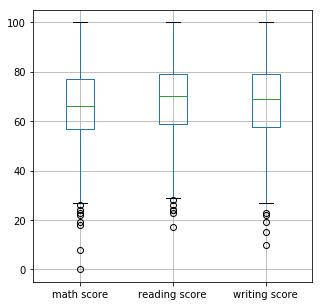

In [116]:
plt.rcParams['figure.figsize'] = (5,5)
data.boxplot()
plt.show()

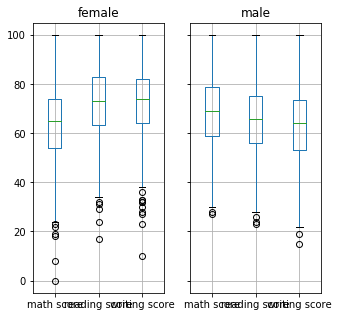

In [117]:
data.groupby(['gender']).boxplot()
plt.show()

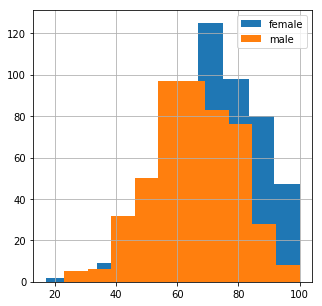

In [146]:
data.groupby(['gender'])['reading score'].hist()

plt.legend(data.gender.unique())
plt.show()

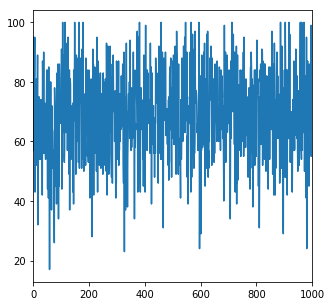

In [119]:
data['reading score'].plot()
plt.show()

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['math score'],df['reading score'])

line = slope*df['math score']+intercept
plt.plot(x, line, 'r')
data.plot.scatter(x='math score', y='reading score', figsize=(8,6))
plt.show()

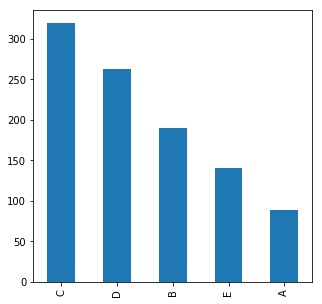

In [132]:
data['race/ethnicity'].value_counts().plot.bar()
plt.show()

## Exercícios

### Quiz

## Referências

http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html  
http://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook  
https://medium.com/data-hackers/uma-introdução-simples-ao-pandas-1e15eea37fa1  
https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/  